<a href="https://colab.research.google.com/github/CloverWS/LSTM-Spam-Email-Recognition/blob/master/Spam-Email-Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np

data=pd.read_csv('email.csv')
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,email,label
3094,Subject: calpine 1465ricky sent the nom over e...,1
3296,Subject: guadalupe power partnerstexas indepen...,1
1012,Subject: nom change on tennessee forwarded by ...,1
4948,Subject: dating service for nauuughty minded p...,0
1147,Subject: hpl noms for july 8 2000( see attache...,1


In [8]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(data['email'].values)
sequences = tokenizer.texts_to_sequences(data['email'].values)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(sequences,data['label'].values, test_size = 0.20, random_state = 42)

In [14]:

maxlen = 20
from keras import preprocessing
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [33]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding,LSTM
model = Sequential()
model.add(Embedding(2000, 8, input_length=maxlen))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 20, 8)             16000     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               43600     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 59,701
Trainable params: 59,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
100/100 [==============================] - 4s 36ms/step - loss: 0.4055 - accuracy: 0.8166 - val_loss: 0.2616 - val_accuracy: 0.8825
Epoch 2/5
100/100 [==============================] - 3s 33ms/step - loss: 0.2088 - accuracy: 0.9194 - val_loss: 0.2068 - val_accuracy: 0.9262
Epoch 3/5
100/100 [==============================] - 3s 34ms/step - loss: 0.1641 - accuracy: 0.

In [34]:
result=model.evaluate(x_test,y_test)
print("test loss:{}\ntest accuracy:{}".format(result[0],result[1]))

37/37 [==============================] - 0s 6ms/step - loss: 0.1701 - accuracy: 0.9300
test loss:0.17009983956813812
test accuracy:0.9300341010093689


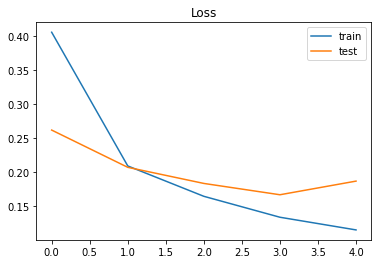

In [35]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

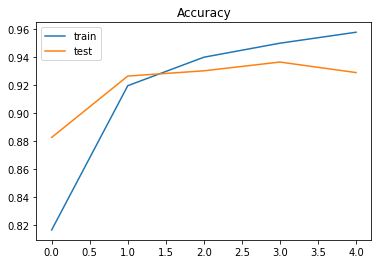

In [36]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()